In [1]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
from Bio.SeqUtils import GC

Считываем данные в формате fastq-illumina, так как иначе приходилось бы вычитать 33 для корректной оценки качества.
Собираем словарь, в котором ключ -- это процент, а значение -- это количество ридов соответствующее такому проценту. Немного грубовато округляем до целого, но для визуализации нестрашно. В ином случае -- вычисления шли бы сильно дольше

In [7]:
def norm_GC(read):
    gc = 0
    full_seq = 0
    pointer = 0
    for i in read.seq:
        if read.letter_annotations['phred_quality'][pointer] > 0:
            if i == 'G' or i == 'C':
                gc += 1
                full_seq += 1
            elif i != 'N':
                full_seq += 1
    return gc / full_seq * 100

Выше реализована функция, которая подсчитывает GC верно (в отличии от функции из Bio.SeqUtils)

In [8]:
percentage = []
d = {}
for i in range(101):
    d[i] = 0
for record in SeqIO.parse("frag.R1.fastq", 'fastq-illumina'):
    if np.mean(record.letter_annotations['phred_quality']) > 20:
        d[round(norm_GC(record))] += 1
        
for record in SeqIO.parse("frag.R2.fastq", 'fastq-illumina'):
    if np.mean(record.letter_annotations['phred_quality']) > 20:
        d[round(norm_GC(record))] += 1

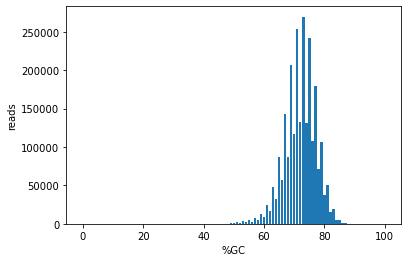

In [9]:
plt.bar(range(len(d)), d.values(), align="center")
plt.xlabel('%GC')
plt.ylabel('reads')
None

С помощью fastqc можем убедиться, что распределение GC действительно похоже такое

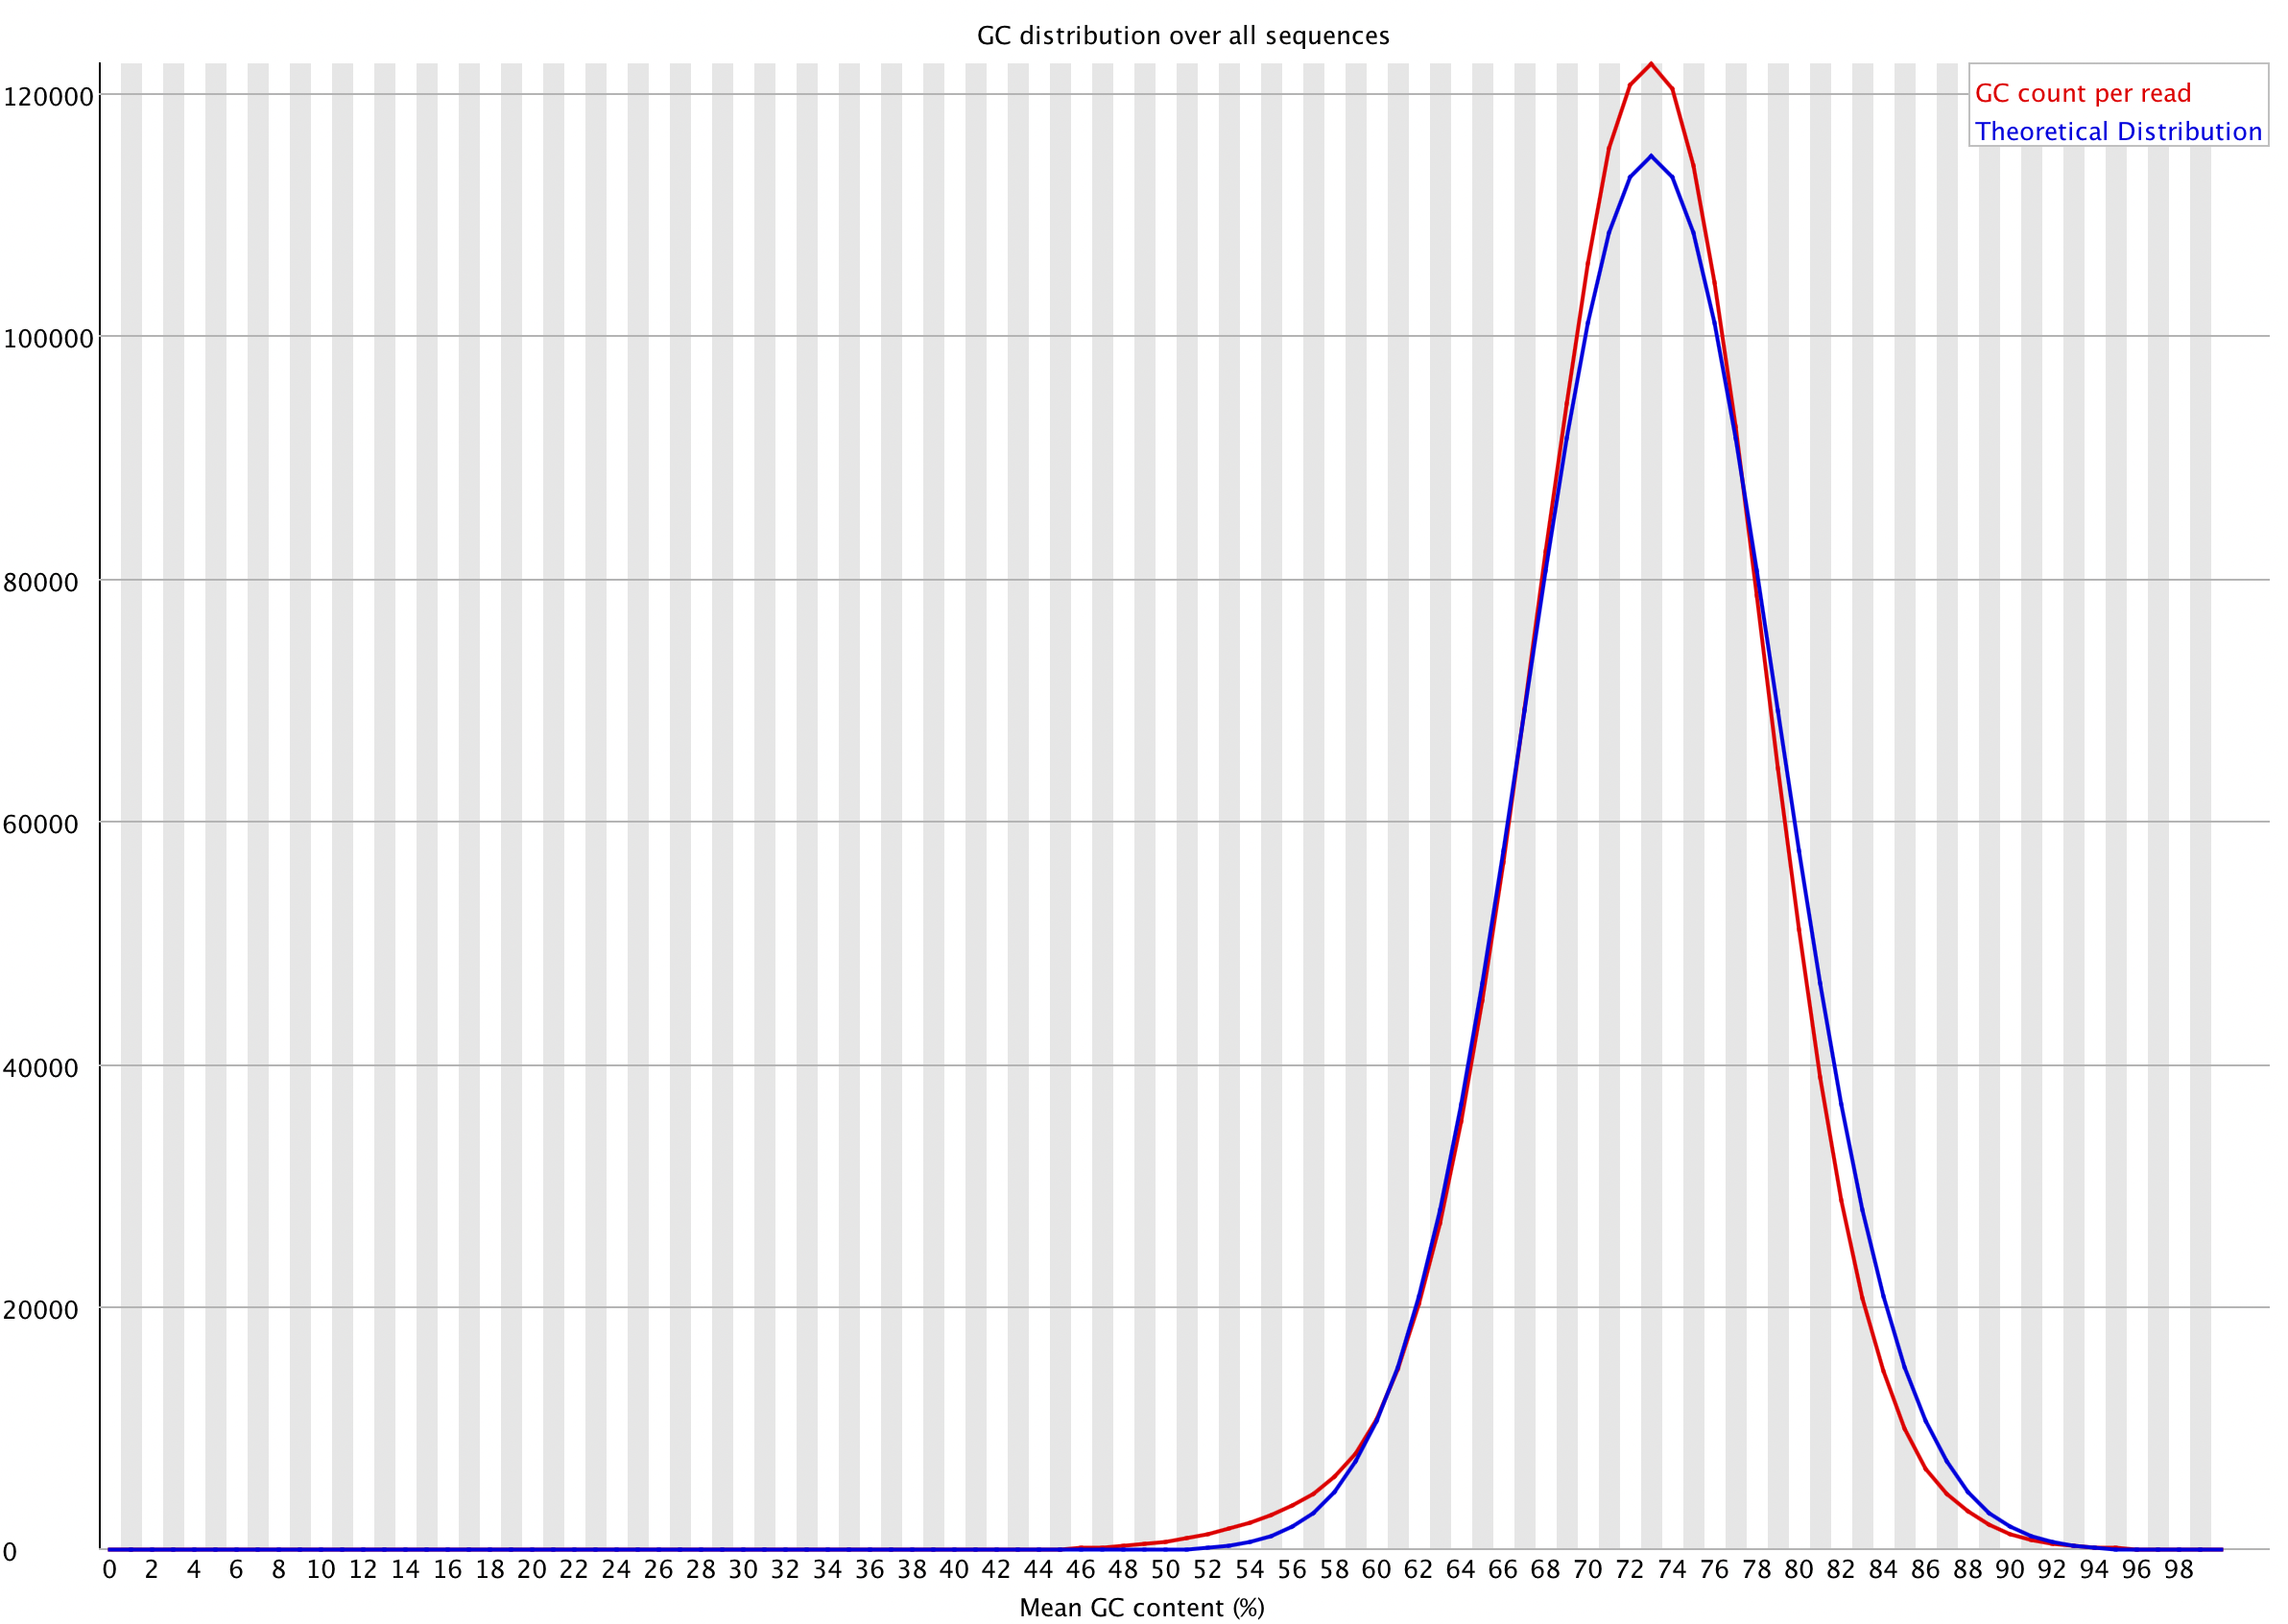

Большая часть ридов имеет GC% равное от 60 до 80
На графике из FASTQC меньше ридов, но это всё потому, что каждый файл рассматривается отдельно. Для второго хвоста ситуация аналогичная

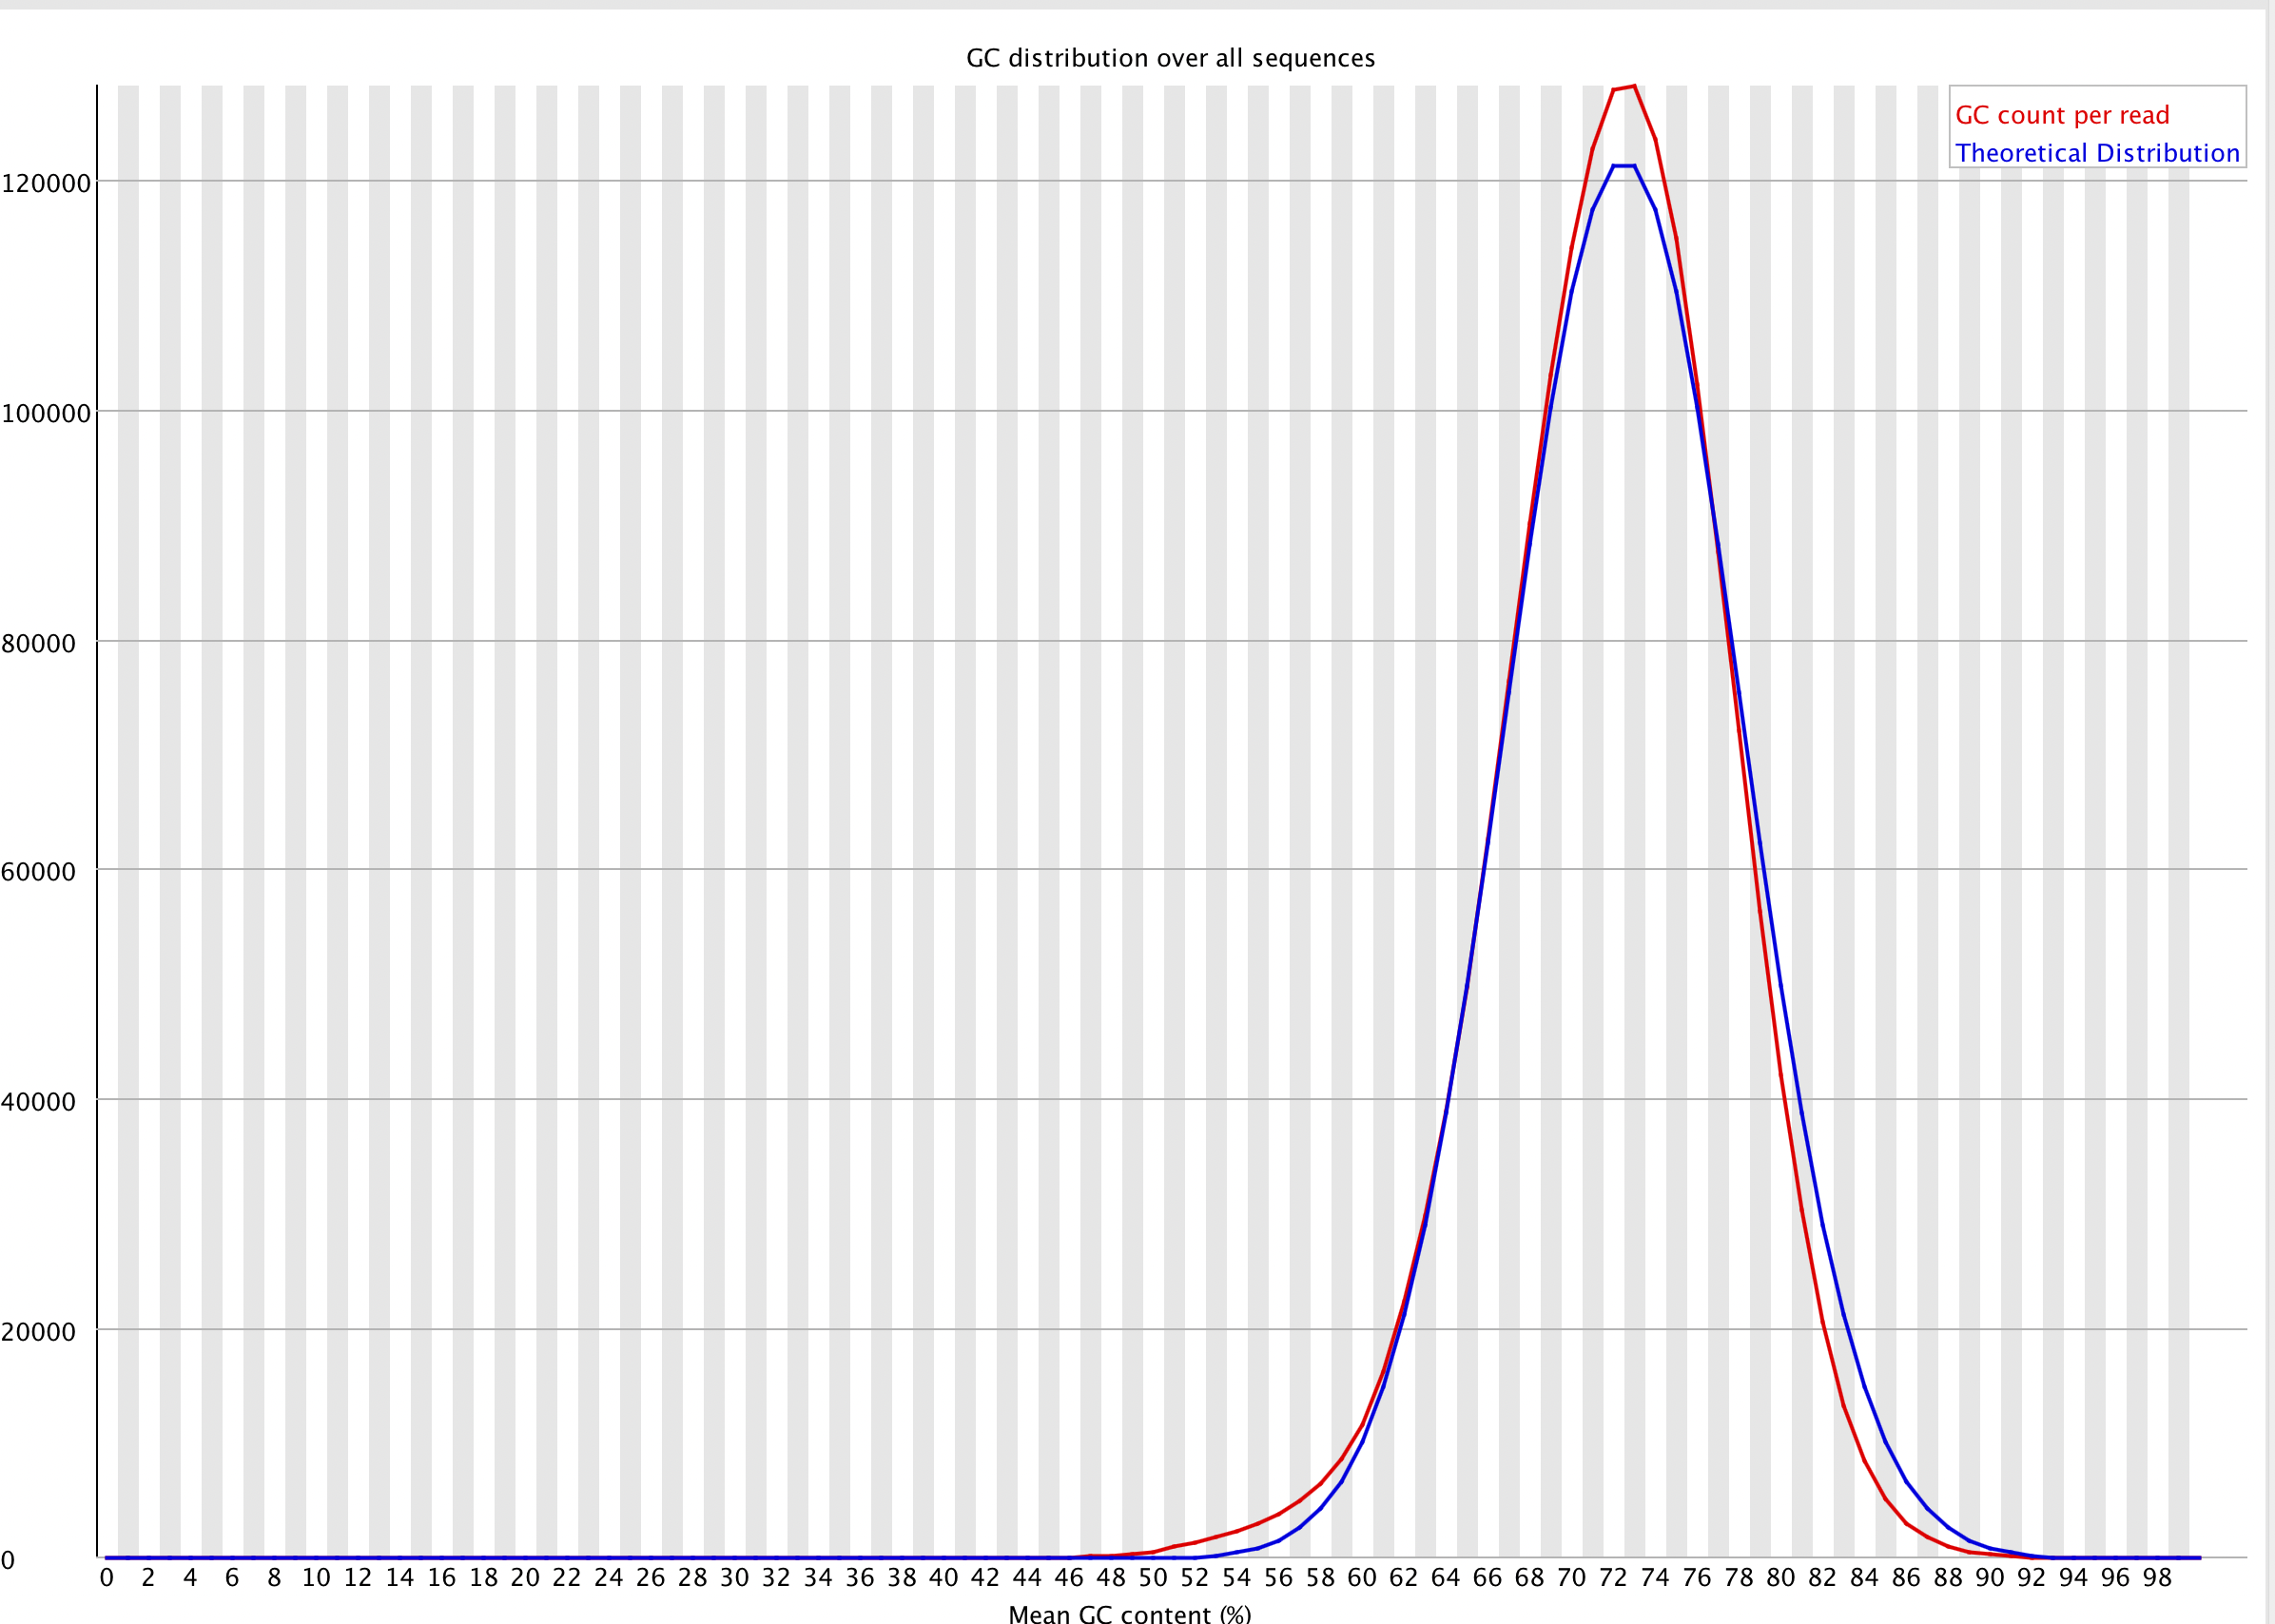